In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Salary Ranges by Job Classification

Shows the job titles associated with job classifications. Used with the Job Titles by Classification and Employees by Classification.<br/>
https://data.sfgov.org/City-Management-and-Ethics/Salary-Ranges-by-Job-Classification/7h4w-reyq

In [2]:
# Load in the dataset
salary_ranges = pd.read_csv('/home/yungshun/workspace/py3/feature-understanding/datasets/Salary_Ranges_by_Job_Classification.csv')

In [3]:
# View the first few rows and the headers
salary_ranges.head(2)

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,0.0,0.0,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,15.0,15.0,323,0,D


In [4]:
# Get a sense of how many rows of data there are, if there are any missing values, and what data type each column has
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null float64
Biweekly Low Rate     1356 non-null float64
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 137.8+ KB


In [5]:
# Another method to check for missing values
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [6]:
# Show descriptive stats
salary_ranges.describe()

,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,1.294985,3161.727021,3754.652006,392.676991,0.150442
std,1.045816,1481.002904,1605.157054,338.100562,1.006734
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2145.000000,2607.000000,21.000000,0.000000
50%,1.000000,2856.500000,3465.000000,351.000000,0.000000
75%,1.000000,3703.000000,4484.000000,790.000000,0.000000
max,5.000000,12120.770000,12120.770000,990.000000,11.000000


### Quantitative data

In [7]:
# If there is '$' in both 'Biweekly High Rate' and 'Biweekly Low Rate' columns (the old dataset, not my case), 
# We need to clean our Biweekly High and Low Rate columns to remove the dollar sign in order to visualize
# salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$', ''))
# salary_ranges['Biweekly Low Rate'] = salary_ranges['Biweekly Low Rate'].map(lambda value: value.replace('$', ''))
# Check to see the '$' has been removed
# salary_ranges.head(2)

In [8]:
# Convert the Biweekly columns to float (in my case, they already are)
# salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)
# salary_ranges['Biweekly Low Rate'] = salary_ranges['Biweekly Low Rate'].astype(float)

### Qualitatvie data

In [9]:
# Convert Job Code, Grade, Sal Plan, Pay Type to str
salary_ranges['Job Code'] = salary_ranges['Job Code'].astype(str)
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)
salary_ranges['Sal Plan'] = salary_ranges['Sal Plan'].astype(str)
salary_ranges['Pay Type'] = salary_ranges['Pay Type'].astype(str)

In [10]:
# Convert Eff Date and Sal End Date to datetime
salary_ranges['Eff Date'] = pd.to_datetime(salary_ranges['Eff Date'])
salary_ranges['Sal End Date'] = pd.to_datetime(salary_ranges['Sal End Date'])

In [11]:
# Check to see if converting the data types worked
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null datetime64[ns]
Sal End Date          1356 non-null datetime64[ns]
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null float64
Biweekly Low Rate     1356 non-null float64
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 137.8+ KB


In [12]:
salary_ranges.describe()

,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,1.294985,3161.727021,3754.652006,392.676991,0.150442
std,1.045816,1481.002904,1605.157054,338.100562,1.006734
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2145.000000,2607.000000,21.000000,0.000000
50%,1.000000,2856.500000,3465.000000,351.000000,0.000000
75%,1.000000,3703.000000,4484.000000,790.000000,0.000000
max,5.000000,12120.770000,12120.770000,990.000000,11.000000


### Quantitative data

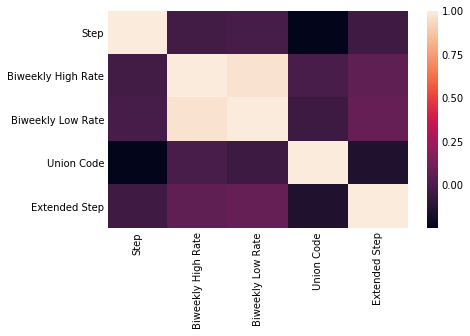

In [13]:
# Show the correlation heatmap of the data to get a better sense of what we are looking at
sns.heatmap(salary_ranges.corr())
# No correlation across the data. 

### Qualitative data

In [14]:
# Because there is little correlation, read the headers again and check the number of unique elements for each column of interest.

In [15]:
salary_ranges['Job Code'].nunique()

1268

In [16]:
salary_ranges['Eff Date'].nunique()

6

In [17]:
salary_ranges['Sal End Date'].nunique()

6

In [18]:
salary_ranges['Grade'].nunique()

688

In [19]:
salary_ranges['Pay Type'].nunique()

6

In [20]:
salary_ranges['Sal Plan'].nunique()

1

### Ratio level

In [21]:
# Take 'Biweekly High Rate' for instance

The four levels of data:
1. <b>The nominal level:</b> Discrete, orderless
2. <b>The ordinal level:</b> Ordered, categories, comparisions
3. <b>The interval level:</b> Differences between ordered values have meaning
4. <b>The ratio level:</b> Continuous true 0 allows ratio statements

In [22]:
# Grade (Nominal) - Biweekly High Rate (Ratio)

Text(0.5,1,'Top 20 Grade by Max Biweekly High Rate')

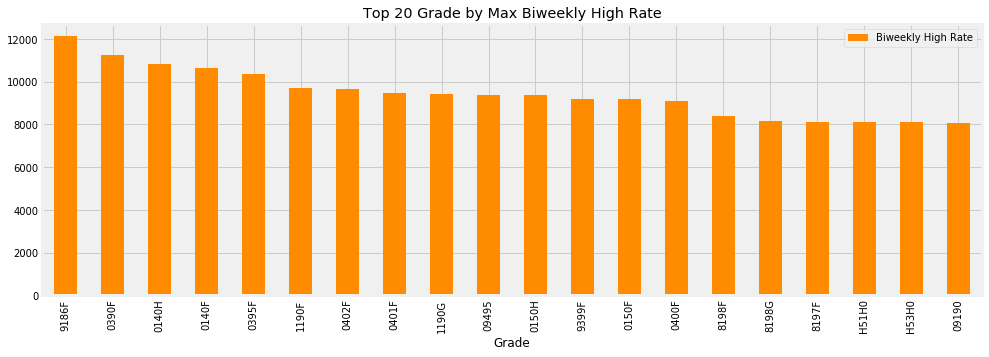

In [23]:
# Which Grade has the maximum Biweekly high rate
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].max().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Max Biweekly High Rate')

Text(0.5,1,'Top 20 Grade by Mean Biweekly High Rate')

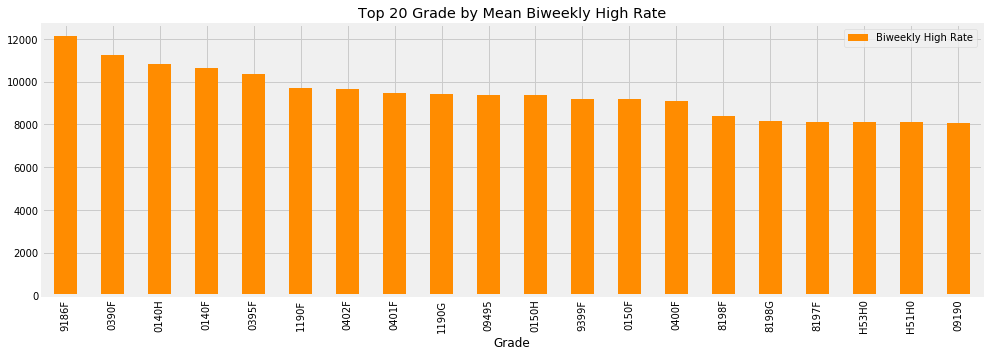

In [24]:
# What is the average rate across all of the Grades
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

Text(0.5,1,'Top 20 Grade by Min Biweekly High Rate')

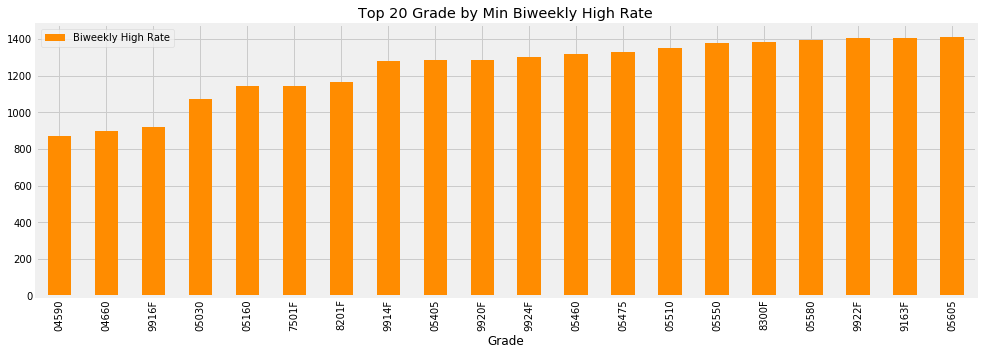

In [25]:
# Which Grade has the minimum Biweekly high rate
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].max().sort_values(
    'Biweekly High Rate', ascending=True).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Min Biweekly High Rate')

In [26]:
# Step (Ratio) - Biweekly High Rate (Ratio)

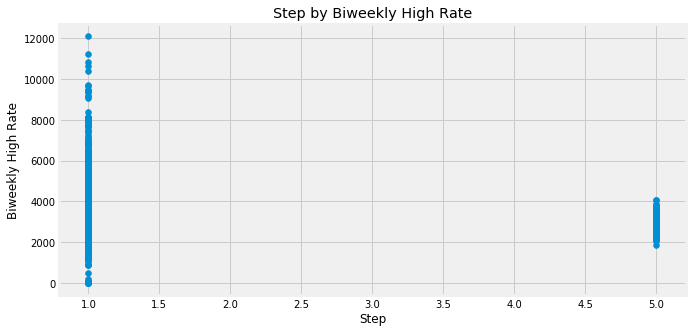

In [27]:
x = salary_ranges['Step']
y = salary_ranges['Biweekly High Rate']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
ax.set_xlabel('Step')
ax.set_ylabel('Biweekly High Rate')
ax.set_title('Step by Biweekly High Rate')
plt.show()

In [28]:
# Extended Step (Ratio) - Biweekly High Rate (Ratio)

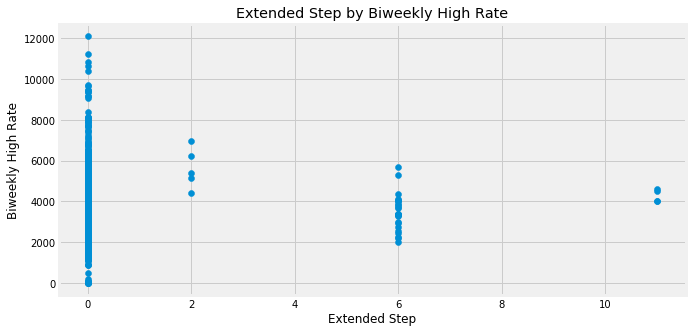

In [29]:
x = salary_ranges['Extended Step']
y = salary_ranges['Biweekly High Rate']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
ax.set_xlabel('Extended Step')
ax.set_ylabel('Biweekly High Rate')
ax.set_title('Extended Step by Biweekly High Rate')
plt.show()

In [30]:
# Union Code (nominal) - Biweekly High Rate (Ratio)

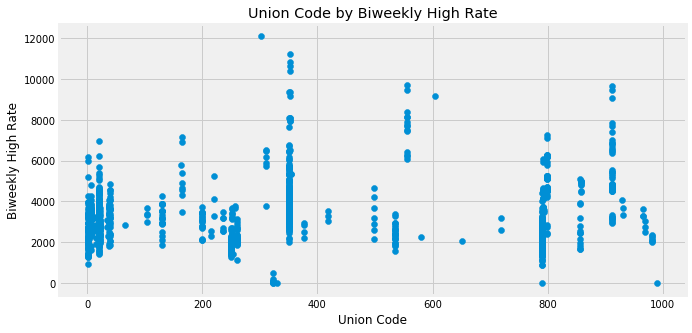

In [31]:
x = salary_ranges['Union Code']
y = salary_ranges['Biweekly High Rate']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
ax.set_xlabel('Union Code')
ax.set_ylabel('Biweekly High Rate')
ax.set_title('Union Code by Biweekly High Rate')
plt.show()

Text(0.5,1,'Top 10 Union Codes')

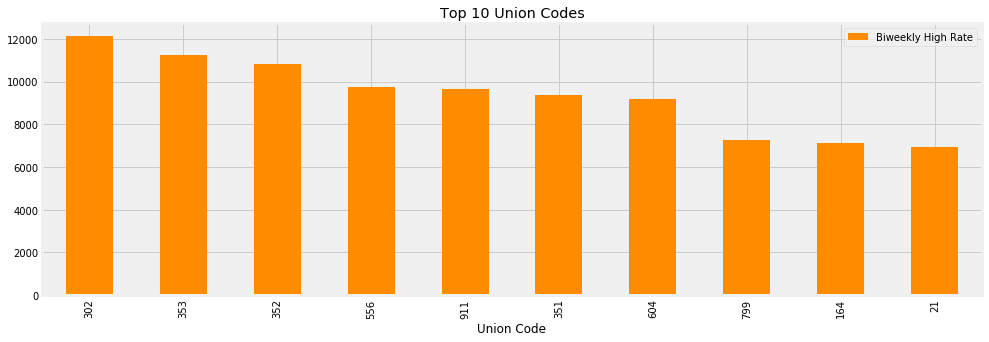

In [32]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Union Code')[['Biweekly High Rate']].max().sort_values(
    'Biweekly High Rate', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 10 Union Codes')

In [33]:
# Pay Type (Nominal) - Biweekly High Rate (Ratio)

Text(0.5,1,'Max by Pay Type')

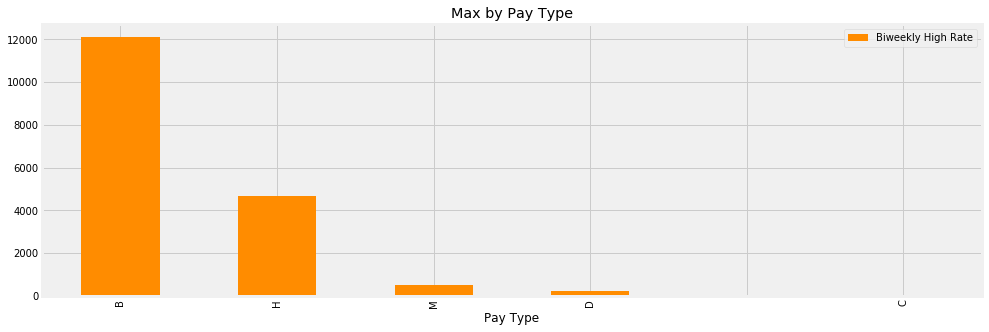

In [34]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Pay Type')[['Biweekly High Rate']].max().sort_values(
    'Biweekly High Rate', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max by Pay Type')

In [35]:
# Job Code (Nominal) - Biweekly High Rate (Ratio)

Text(0.5,1,'Max by Job Code')

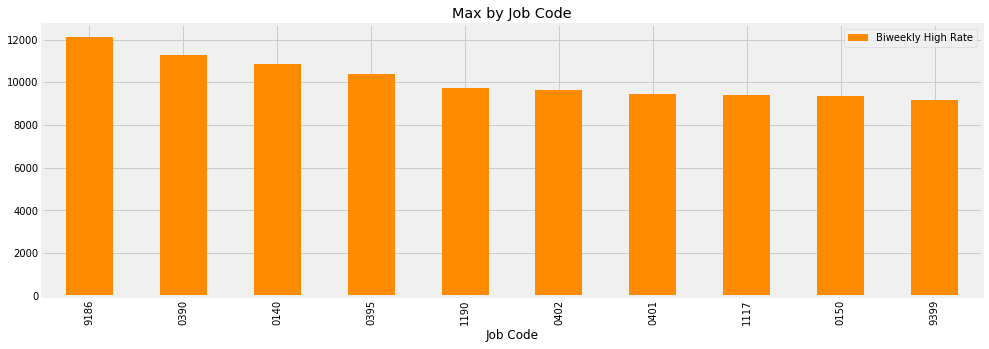

In [36]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Job Code')[['Biweekly High Rate']].max().sort_values(
    'Biweekly High Rate', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Max by Job Code')